In [ ]:
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
titanic_df = pd.read_csv('train.csv')

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [31]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

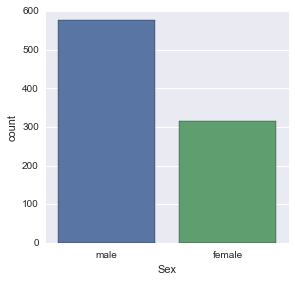

In [33]:
sns.factorplot('Sex',kind='count',data=titanic_df)

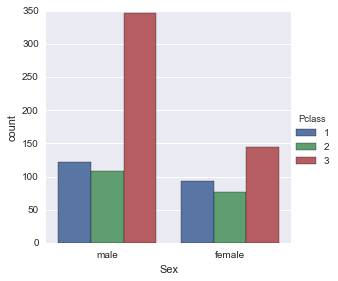

In [34]:
sns.factorplot('Sex', kind='count', data=titanic_df, hue='Pclass')

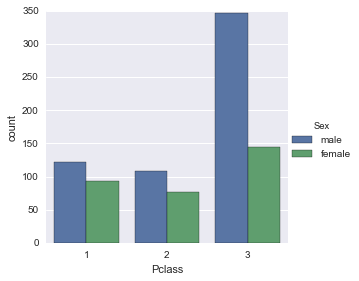

In [37]:
sns.factorplot('Pclass', kind='count', data=titanic_df, hue='Sex')

In [38]:
def male_female_child(passenger):
    """Bin passenger into male, female or child"""
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [42]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [44]:
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


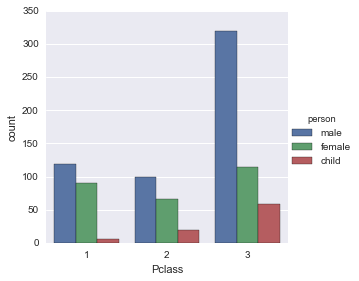

In [46]:
sns.factorplot('Pclass', data=titanic_df, hue='person', kind='count')

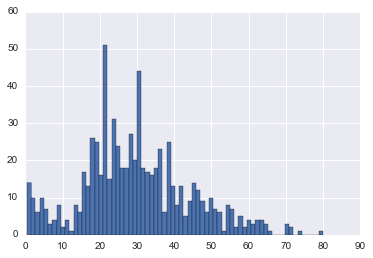

In [48]:
titanic_df['Age'].hist(bins=70)

In [49]:
titanic_df['Age'].mean()

29.69911764705882

In [50]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [61]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=0)

ValueError: ('too many values to unpack', u'occurred at index Age')

In [63]:
def count_col(col):
    return max(col)

titanic_df.apply(count_col)

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
Cabin                                    T
Embarked                                 S
person                                male
dtype: object

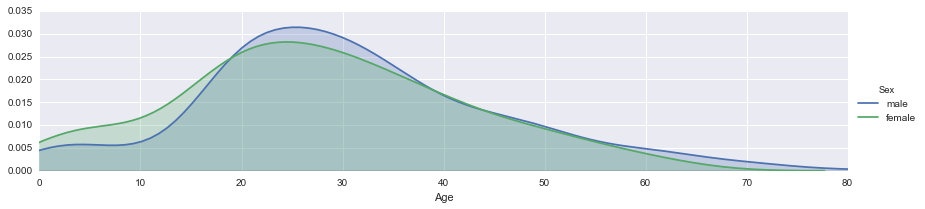

In [66]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))

fig.add_legend()

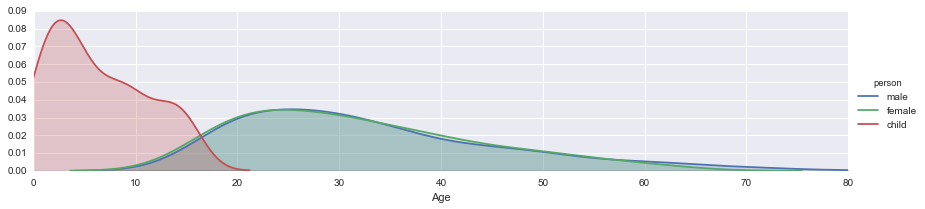

In [67]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))

fig.add_legend()

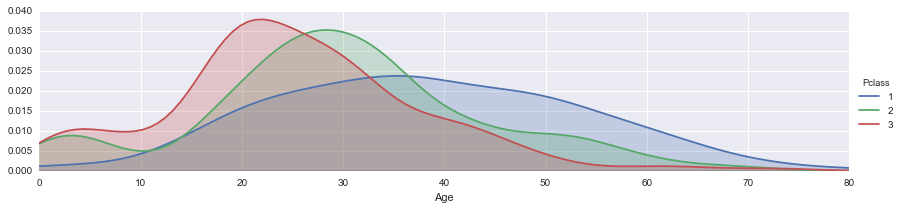

In [68]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))

fig.add_legend()

In [69]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [70]:
deck = titanic_df['Cabin'].dropna()

In [72]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

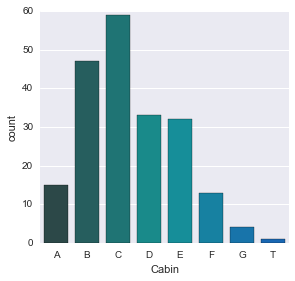

In [81]:
# Get the first letter of the cabin
levels = [level[0] for level in deck]
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data=cabin_df, kind='count', palette='winter_d', order=list('ABCDEFGT'))

In [119]:
titanic_df['Level'] = cabin_df 

In [120]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Level
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no,C


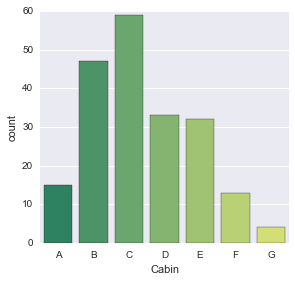

In [83]:
# Get rid of T cabin
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin', data=cabin_df, kind='count', palette='summer', order=list('ABCDEFG'))

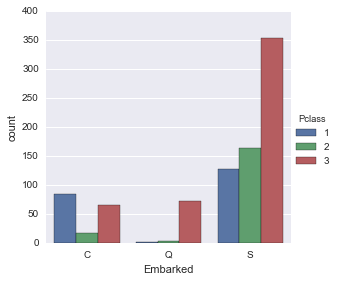

In [86]:
sns.factorplot('Embarked', data=titanic_df, kind='count', hue='Pclass', order=['C', 'Q', 'S'])

In [87]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [88]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [91]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


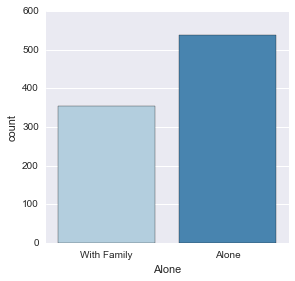

In [93]:
sns.factorplot('Alone', data=titanic_df, kind='count', palette='Blues')

In [94]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

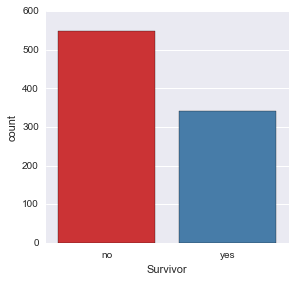

In [96]:
sns.factorplot('Survivor', data=titanic_df, kind='count', palette='Set1')

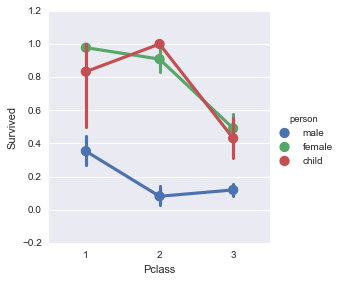

In [99]:
sns.factorplot('Pclass', 'Survived', data=titanic_df, hue='person')

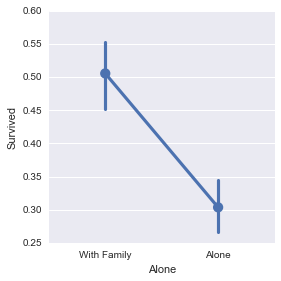

In [128]:
# Did being alone affect the survival rate?
sns.factorplot('Alone', 'Survived', data=titanic_df)

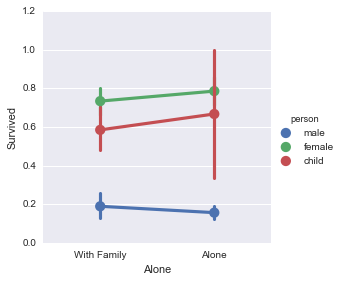

In [130]:
# Differentiate by men, women and children
sns.factorplot('Alone', 'Survived', data=titanic_df, hue='person')

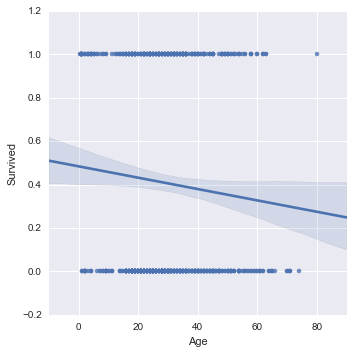

In [100]:
sns.lmplot('Age', 'Survived', data=titanic_df)

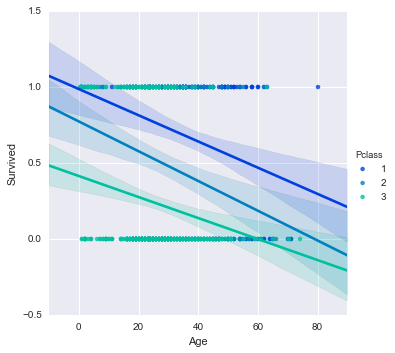

In [102]:
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter')

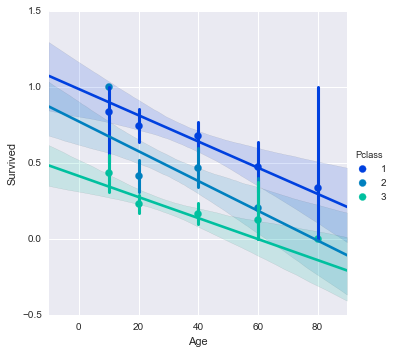

In [104]:
generations = [10, 20, 40, 60, 80]

sns.lmplot('Age', 'Survived', hue='Alone', palette='winter', data=titanic_df, x_bins=generations)

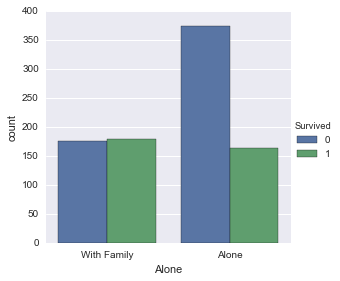

In [115]:
sns.factorplot('Alone', data=titanic_df, kind='count', hue='Survived')

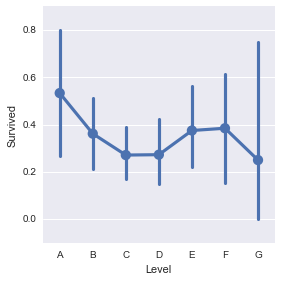

In [138]:
sns.factorplot('Level', 'Survived', data=titanic_df, order=list('ABCDEFG'))

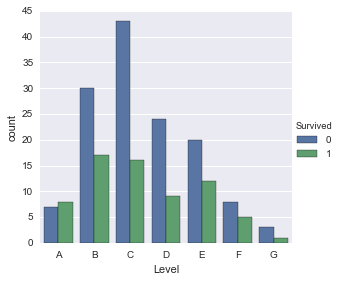

In [137]:
sns.factorplot('Level', data=titanic_df, kind='count', hue='Survived', order=list('ABCDEFG'))